In [1]:
# import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Steps to follow
- Read the data
- clean the data
- Divide it into train and test data
    - __Start linear regression on the train data__
        - Split the data into x and y.
        - Do RFE on that that
            - Start making model
            - Do VIF and lr_model

# Reading and understanding the data

In [3]:
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# shape of data
bike.shape

(730, 16)

In [5]:
# checking the min-max value of out dataset
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# checking the information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# Cleaning the data
 $Droping__unwanting__column $

-``instant`` : this column is only for the indexing so i drop this. <br>
-``dteday`` : month and year are already picked out from the data. <br>
-``registered`` and ``casual`` : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific categoy, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types

In [7]:
new_bike = bike.drop(["instant","dteday","registered","casual"],axis=1)
new_bike.shape

(730, 12)

In [8]:
# Checking the null column
new_bike.isnull().sum()


season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

# Visualising the categorical 

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

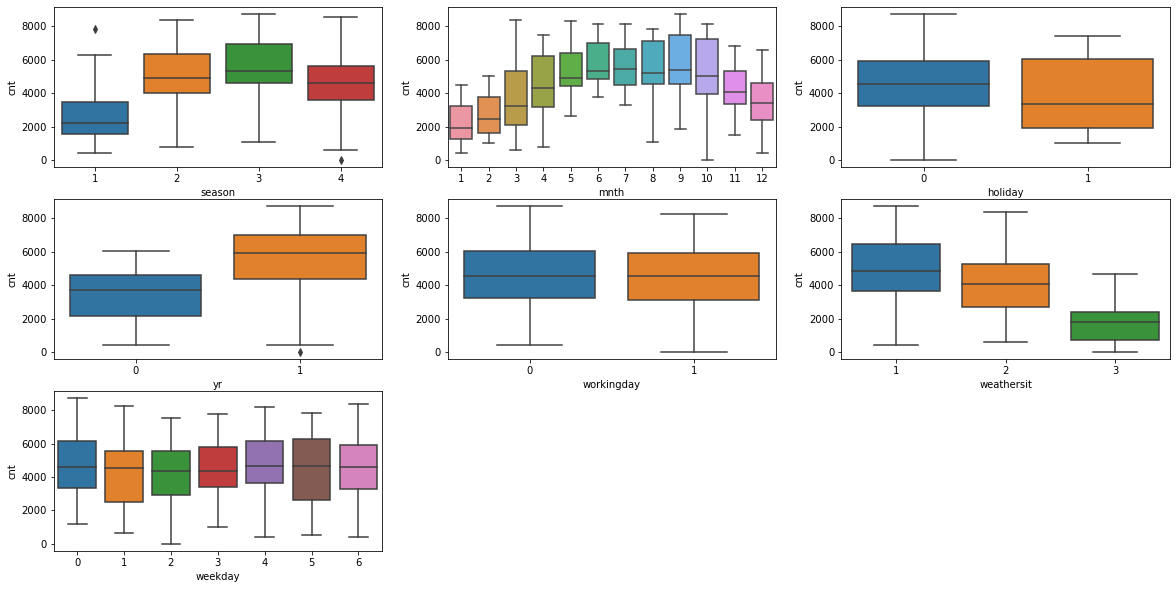

In [9]:
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(data = new_bike, x="season",y="cnt")

plt.subplot(3,3,2)
sns.boxplot(data = new_bike, x="mnth",y="cnt")

plt.subplot(3,3,3)
sns.boxplot(data = new_bike, x="holiday",y="cnt")

plt.subplot(3,3,4)
sns.boxplot(data = new_bike, x="yr",y="cnt")

plt.subplot(3,3,5)
sns.boxplot(data = new_bike, x="workingday",y="cnt")

plt.subplot(3,3,6)
sns.boxplot(data = new_bike, x="weathersit",y="cnt")

plt.subplot(3,3,7)
sns.boxplot(data = new_bike, x="weekday",y="cnt")

## So this is clear from the upper subplots that we have to make dummy variables for these columns that is
[season , mnth, weathersit ,weekday ]

In [10]:
# For dummy variable first we have to make them as catefory datatype
new_bike["season"]= new_bike["season"].astype("category")
new_bike["mnth"]= new_bike["mnth"].astype("category")
new_bike["weekday"]= new_bike["weekday"].astype("category")
new_bike["weathersit"]= new_bike["weathersit"].astype("category")
new_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


# Dummy variable

In [11]:
new_bike = pd.get_dummies(new_bike,drop_first=True)
new_bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


# Spliting the data into train and test dataset

In [12]:
# Checking the shape of older dataset
new_bike.shape

(730, 30)

In [13]:
# for that we have to import one library
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(new_bike,train_size = 0.70,random_state= 333)

In [14]:
df_train.shape

(510, 30)

In [15]:
df_test.shape

(220, 30)

# Exploratory data Analysis

## Correlation 

<AxesSubplot:>

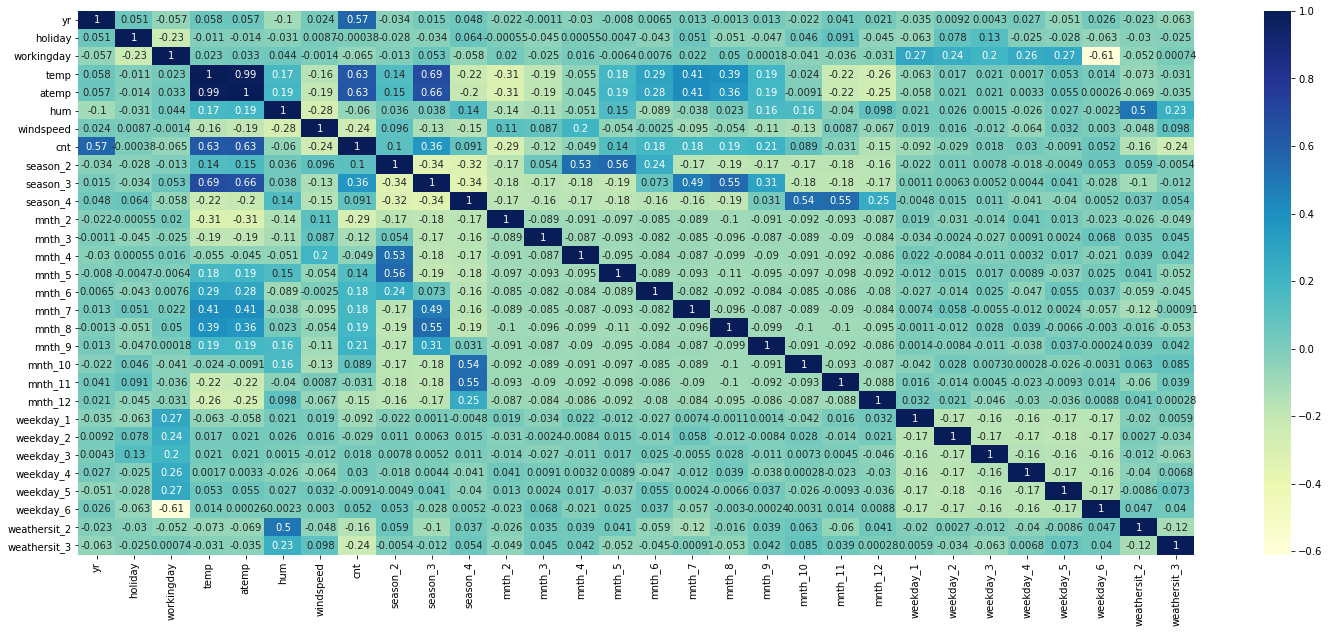

In [16]:
plt.figure(figsize=(25,10))
sns.heatmap(df_train.corr(),cmap="YlGnBu",annot=True)

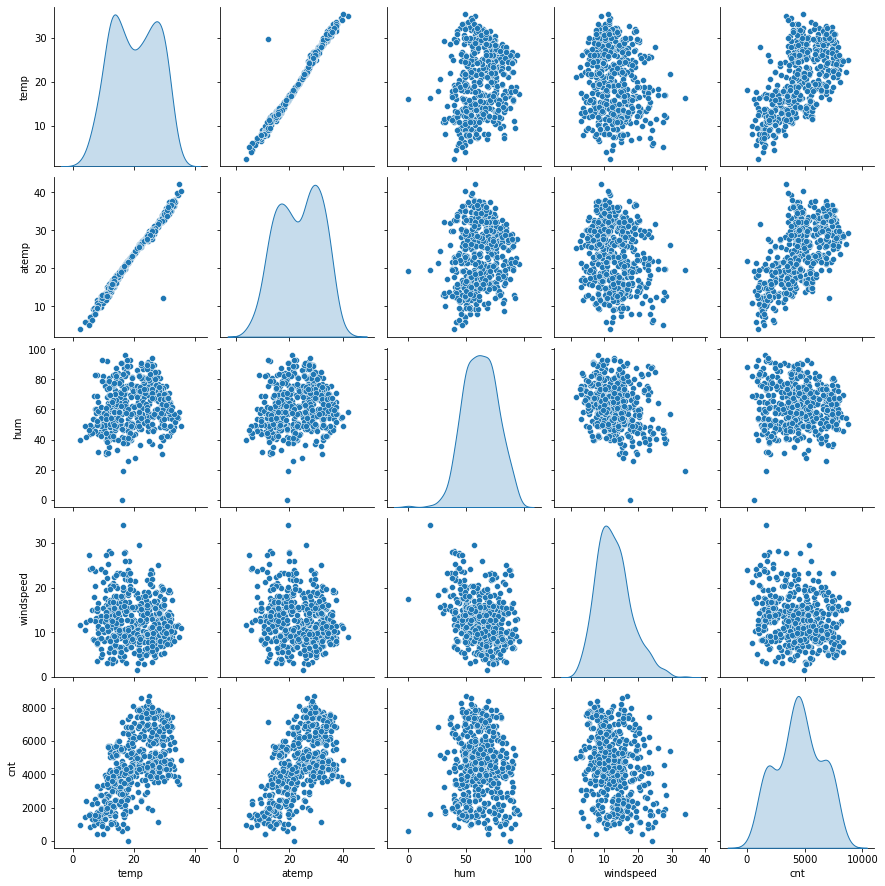

In [17]:
# Create a new dataframe of only numeric variables:

bike_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

# Rescalling the  data 
in 0 and 1

In [18]:
# for this we have to import one library
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [19]:
# first we have to apply scaler on
var=["temp","atemp","hum","windspeed","cnt"]
df_train[var] = scaler.fit_transform(df_train[var])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,0,0,1,0,0,0,0,0
714,1,0,1,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,1,0,0,0,0,0,1,0
8,0,0,1,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,1,0,0,0,0,0,0
502,1,0,0,0.629300,0.619631,0.543723,0.235894,0.876323,1,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.690196,0.540777,0.515530,0.647696,0.346806,0.514508,0.245098,0.262745,...,0.086275,0.076471,0.141176,0.152941,0.131373,0.139216,0.147059,0.143137,0.343137,0.025490
std,0.500487,0.151726,0.462867,0.227939,0.213652,0.149805,0.160182,0.224150,0.430568,0.440557,...,0.281045,0.266010,0.348545,0.360284,0.338139,0.346511,0.354512,0.350557,0.475223,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.231105,0.359468,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646584,0.326920,0.516107,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.758008,0.434607,0.683473,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Now starting with the linear model

# Dividing the model into x and y

In [21]:
y_train = df_train.pop("cnt")
X_train = df_train

# RFE

In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [23]:
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)


In [24]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 11),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 10),
 ('mnth_3', True, 1),
 ('mnth_4', False, 8),
 ('mnth_5', False, 6),
 ('mnth_6', False, 7),
 ('mnth_7', False, 15),
 ('mnth_8', False, 9),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 12),
 ('mnth_12', False, 13),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', False, 2),
 ('weekday_4', False, 4),
 ('weekday_5', False, 3),
 ('weekday_6', False, 14),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [25]:
columns= X_train.columns[rfe.support_]
columns

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weekday_1', 'weekday_2',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [26]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_11', 'mnth_12', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6'],
      dtype='object')

In [27]:
X_train_RFE = X_train[columns]


# Now performing linear regression with statsmodel

## Model 1

## VIF

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Feature"] = X_train_RFE.columns
vif["VIF"] = [variance_inflation_factor(X_train_RFE.values,i) for i in range(X_train_RFE.shape[1])]

vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending= False)

In [29]:
vif

,Feature,VIF
1,temp,385.75
2,atemp,363.51
3,hum,16.16
6,season_3,7.09
4,windspeed,4.53
5,season_2,3.51
7,season_4,3.00
13,weathersit_2,2.16
0,yr,2.02
10,mnth_10,1.67


In [30]:
import statsmodels.api as sm

# Add constant
X_train_lm_1 = sm.add_constant(X_train_RFE)

# fit the model
lr = sm.OLS(y_train,X_train_lm_1).fit()
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.0
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.61e-185
Time:                        21:14:31   Log-Likelihood:                 506.93
No. Observations:                 510   AIC:                            -981.9
Df Residuals:                     494   BIC:                            -914.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2378      0.028      8.430   

- __we have to find the VIF ``<`` 5__
    - We could have:
    - High p-value, high VIF
    - High-low:
        - High p-value,low VIF ``remove them first``
        - low VIF ,high p-value ``remove after the first``
    - Low-low:
        - Low VIF,LOW p-value

# Model 2

__Removing the "atemp" variable becuase of its high p-value and high vif__

In [31]:
# dropping the col
X_train_new = X_train_RFE.drop(["atemp"],axis=1)


In [32]:
vif = pd.DataFrame()
vif["Feature"] = X_train_new.columns
vif["VIF"] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]

vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending= False)
vif

,Feature,VIF
1,temp,23.17
2,hum,15.87
5,season_3,6.99
3,windspeed,4.37
4,season_2,3.50
6,season_4,2.99
12,weathersit_2,2.15
0,yr,2.02
9,mnth_10,1.67
8,mnth_9,1.28


In [33]:
# Add constant
X_train_lm_2 = sm.add_constant(X_train_new)

# fit the model
lr2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.5
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.42e-186
Time:                        21:14:31   Log-Likelihood:                 506.72
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     495   BIC:                            -919.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2390      0.028      8.501   

__we show that the "hum" has high VIF but this is second highest VIF value as compare to "temp", we could not drop the temp col becuase "temp" is very related to bike sharing__
- So we will drop "hum".

# Model 3

In [34]:
#dropooing hum col
X_train_new =X_train_new.drop(["hum"],axis=1)


In [35]:
vif = pd.DataFrame()
vif["Feature"] = X_train_new.columns
vif["VIF"] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]

vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending= False)
vif

,Feature,VIF
1,temp,15.16
4,season_3,6.65
2,windspeed,3.91
3,season_2,3.47
5,season_4,2.88
0,yr,2.02
8,mnth_10,1.66
11,weathersit_2,1.51
7,mnth_9,1.27
10,weekday_2,1.21


In [36]:
# Add constant
X_train_lm_3 = sm.add_constant(X_train_new)

# fit the model
lr3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr3.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.7
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.26e-183
Time:                        21:14:32   Log-Likelihood:                 496.35
No. Observations:                 510   AIC:                            -964.7
Df Residuals:                     496   BIC:                            -905.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1413      0.018      7.678   

# Model 4

__we show that the "season3" has high VIF but this is second highest VIF value as compare to "temp", we could not drop the temp col becuase "temp" is very related to bike sharing__
- So we will drop "season3".

In [37]:
# dropping season 3
X_train_new = X_train_new.drop(["season_3"],axis=1)


In [38]:
vif = pd.DataFrame()
vif["Feature"] = X_train_new.columns
vif["VIF"] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]

vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending= False)
vif

,Feature,VIF
1,temp,4.05
2,windspeed,3.73
0,yr,2.00
4,season_4,1.94
7,mnth_10,1.63
3,season_2,1.56
10,weathersit_2,1.50
6,mnth_9,1.23
9,weekday_2,1.21
8,weekday_1,1.18


In [39]:
X_train_lm_4 = sm.add_constant(X_train_new)

# fit the model
lr4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     197.6
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.24e-180
Time:                        21:14:32   Log-Likelihood:                 486.47
No. Observations:                 510   AIC:                            -946.9
Df Residuals:                     497   BIC:                            -891.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1247      0.018      6.796   

# Model 5

__Dropping "mnth_3" becuase of his high p value__

In [40]:
X_train_new = X_train_new.drop(["mnth_3"],axis=1)


In [41]:
vif = pd.DataFrame()
vif["Feature"] = X_train_new.columns
vif["VIF"] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]

vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending= False)
vif

,Feature,VIF
1,temp,4.02
2,windspeed,3.59
0,yr,1.99
4,season_4,1.91
6,mnth_10,1.63
3,season_2,1.56
9,weathersit_2,1.49
5,mnth_9,1.23
8,weekday_2,1.21
7,weekday_1,1.18


In [42]:
X_train_lm_5 = sm.add_constant(X_train_new)

# fit the model
lr5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          5.15e-180
Time:                        21:14:33   Log-Likelihood:                 482.83
No. Observations:                 510   AIC:                            -941.7
Df Residuals:                     498   BIC:                            -890.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1354      0.018      7.508   

# Model 6 

__dropping  weekday col becuase of his high p value__

In [43]:
X_train_new_1 = X_train_new.drop(["weekday_1"],axis=1)


In [44]:
vif = pd.DataFrame()
vif["Feature"] = X_train_new_1.columns
vif["VIF"] = [variance_inflation_factor(X_train_new_1.values,i) for i in range(X_train_new_1.shape[1])]

vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending= False)
vif

,Feature,VIF
1,temp,3.99
2,windspeed,3.51
0,yr,1.99
4,season_4,1.91
6,mnth_10,1.63
3,season_2,1.56
8,weathersit_2,1.49
5,mnth_9,1.23
7,weekday_2,1.18
9,weathersit_3,1.08


In [45]:
X_train_lm_6 = sm.add_constant(X_train_new_1)

# fit the model
lr6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     231.2
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          3.72e-180
Time:                        21:14:33   Log-Likelihood:                 480.34
No. Observations:                 510   AIC:                            -938.7
Df Residuals:                     499   BIC:                            -892.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1291      0.018      7.223   

# Model 7
- __Dropping "mnth_10" col for it high p-value__

In [46]:
X_train_new_2 = X_train_new_1.drop(["mnth_10"],axis=1)


In [47]:
vif = pd.DataFrame()
vif["Feature"] = X_train_new_2.columns
vif["VIF"] = [variance_inflation_factor(X_train_new_2.values,i) for i in range(X_train_new_2.shape[1])]

vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending= False)
vif

,Feature,VIF
1,temp,3.89
2,windspeed,3.47
0,yr,1.98
3,season_2,1.55
7,weathersit_2,1.49
4,season_4,1.36
5,mnth_9,1.19
6,weekday_2,1.18
8,weathersit_3,1.07


In [48]:
X_train_lm_7 = sm.add_constant(X_train_new_2)

# fit the model
lr7 = sm.OLS(y_train,X_train_lm_7).fit()
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     253.8
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          4.06e-180
Time:                        21:14:34   Log-Likelihood:                 477.38
No. Observations:                 510   AIC:                            -934.8
Df Residuals:                     500   BIC:                            -892.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1266      0.018      7.062   

In [49]:
lr7.params

const           0.126644
yr              0.230624
temp            0.563215
windspeed      -0.153533
season_2        0.082277
season_4        0.127352
mnth_9          0.095920
weekday_2      -0.032851
weathersit_2   -0.073467
weathersit_3   -0.304993
dtype: float64

## Now it seems like our model is ready for prediction and also have  Very less Multicollinearity and p-value of all the variable seems to be very significant

#  Final model interpretaion
- __Hypothesis testing__:
    - It state that:
        - $H0 : B1 = B2 = B3 =,,,,,,=Bn==0$
            - $H1: atleast-one-Bn != 0$
            
# But from the last model we saw that no value is equal to Zero
- which means that we  ``Reject null Hypothesis``

## F-statistics
- __Thus is  used to check the overall significance of the model__<br>
    - Our F-statistics:
        - F-statistics: 253.8
        - Prob (F-statistic): 4.06e-180

**F-statistics value is greater than 1 and p value approx equal to 0.0000, stats that overall model is significan**

# Next step: Residual Analysis

In [50]:
y_train_pred = lr7.predict(X_train_lm_7)


In [51]:
res = y_train-y_train_pred
res

650    0.135354
212   -0.095917
714   -0.166216
8      0.050137
502    0.118563
         ...   
444    0.037778
46     0.004904
374   -0.068724
366   -0.188206
419   -0.061536
Length: 510, dtype: float64

### Graph between X_train_lm_7 and y_train_pred

Text(0.5, 0, 'Errors')

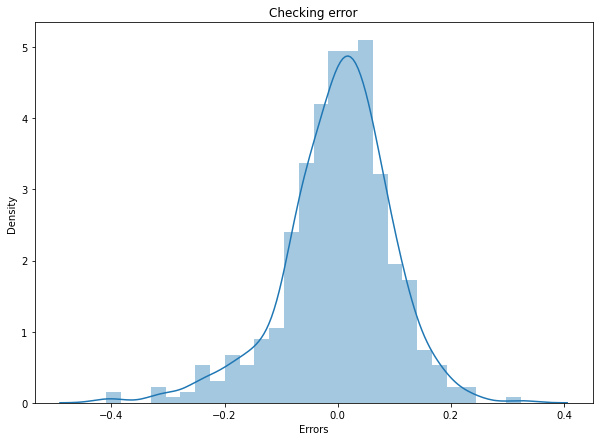

In [52]:
plt.figure(figsize=(10,7))
sns.distplot(res)
plt.title("Checking error")
plt.xlabel("Errors")

from the upper graph we saw that residual are normally distributed.
    Hence our assumtion for linear regression is valid

# Making prediction 
__For now we have to go ahead with the final model that is lr7 and and fit the model and check the assumtion__
- Now for further steps we are will work on the test data set

## 1.Rescalling the test data set

In [53]:
# first lets see the data
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,1,3.957390,4.941955,43.6522,16.522200,986,0,0,...,0,0,0,1,0,0,0,0,0,0
468,1,0,0,20.295000,24.399800,50.2917,12.791439,7460,1,0,...,0,0,0,0,0,0,0,0,0,0
553,1,0,1,33.722500,39.519800,57.3750,8.417143,4672,0,1,...,0,0,1,0,0,0,0,0,0,0
504,1,0,1,25.454153,29.198350,53.0417,17.042589,7129,1,0,...,0,0,1,0,0,0,0,0,0,0
353,0,0,1,15.819153,19.822700,59.5417,4.125244,3750,0,0,...,0,1,0,0,0,1,0,0,1,0


In [54]:
# NOw we make a list for the col we want to rescale
re_com = ["temp","hum","atemp","windspeed","cnt"]

# for re scalling we already installed one library called as MinMaxscaler
df_test[re_com] = scaler.transform(df_test[re_com])


In [55]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,1,0.046591,0.051345,1.042199,0.462217,0.110907,0,0,...,0,0,0,1,0,0,0,0,0,0
468,1,0,0,0.543115,0.253504,1.216503,0.347424,0.855729,1,0,...,0,0,0,0,0,0,0,0,0,0
553,1,0,1,0.951196,0.410595,1.402459,0.212829,0.534975,0,1,...,0,0,1,0,0,0,0,0,0,0
504,1,0,1,0.699909,0.303359,1.288698,0.478229,0.817648,1,0,...,0,0,1,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.205950,1.459341,0.080770,0.428900,0,0,...,0,1,0,0,0,1,0,0,1,0


In [56]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.690909,0.550981,0.249774,1.569796,0.346015,0.519816,0.268182,0.245455,...,0.072727,0.104545,0.150000,0.122727,0.168182,0.150000,0.131818,0.140909,0.322727,0.036364
std,0.501120,0.198531,0.463173,0.228967,0.085071,0.362038,0.159517,0.219880,0.444023,0.431338,...,0.260281,0.306665,0.357886,0.328872,0.374881,0.357886,0.339064,0.348721,0.468586,0.187620
min,0.000000,0.000000,0.000000,0.046591,0.051345,0.657539,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.357562,0.180431,1.294441,0.232051,0.364818,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557133,0.257275,1.568179,0.327568,0.525943,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.750530,0.321074,1.821409,0.435172,0.683128,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.429284,2.449286,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


``Spliting the data into X and y``

In [57]:
y_test = df_test.pop("cnt")
X_test = df_test

In [58]:
# Now we select the variable from the final model this is X_train_new_2
column_1 =X_train_new_2.columns
X_test =X_test[column_1]

# adding constant
X_test_lm = sm.add_constant(X_test)

X_test_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 22 to 483
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         220 non-null    float64
 1   yr            220 non-null    int64  
 2   temp          220 non-null    float64
 3   windspeed     220 non-null    float64
 4   season_2      220 non-null    uint8  
 5   season_4      220 non-null    uint8  
 6   mnth_9        220 non-null    uint8  
 7   weekday_2     220 non-null    uint8  
 8   weathersit_2  220 non-null    uint8  
 9   weathersit_3  220 non-null    uint8  
dtypes: float64(3), int64(1), uint8(6)
memory usage: 9.9 KB


##  Making prediction using the final dataset "lr7"

In [59]:
y_test_pred = lr7.predict(X_test_lm)

# Model evaluation

Text(0.5, 1.0, 'prediction VS actuall value of y\n')

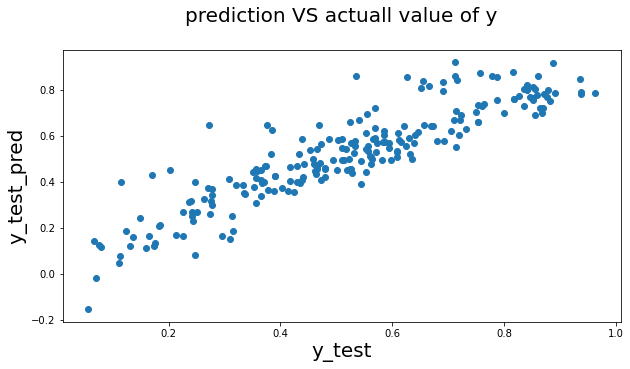

In [61]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_test_pred)
plt.xlabel("y_test",fontdict={"fontsize":20})
plt.ylabel("y_test_pred",fontdict={"fontsize":20})
plt.title("prediction VS actuall value of y\n",fontdict={"fontsize":20})

# R sqaure value for test

In [62]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_test_pred)
round(r2,3)

0.808

# Adjusted R square

$Adjusted R^2=1-(1-R)\times \frac{(N-1)}{(N-P-1)}$

- Where $n$ is the $sample$ $size$ and $p$ is the number of $predictive$ $variable$

In [63]:
#check the shape of X_test
X_test.shape

(220, 9)

In [64]:
# <!--  So our n is -->
n = X_test.shape[0]
p = X_test.shape[1]

In [65]:
Add_r2 = 1-(((1-r2)*(n-1))/(n-p-1))
round(Add_r2,2)

0.8

# Final results 

## From the train and test data set


In [66]:
results = pd.DataFrame(index=["Train data","Test data"])
results["r_sqaure"]=[0.820,0.808] 
results["Add_r_sqaure"]=[0.817,0.800]
results

,r_sqaure,Add_r_sqaure
Train data,0.820,0.817
Test data,0.808,0.800


In [67]:
lr7.params

const           0.126644
yr              0.230624
temp            0.563215
windspeed      -0.153533
season_2        0.082277
season_4        0.127352
mnth_9          0.095920
weekday_2      -0.032851
weathersit_2   -0.073467
weathersit_3   -0.304993
dtype: float64

__As we saw above the r square and adjusted r square value for the ``Train`` and ``Test`` dataset are slightly simmilar
So its seems to be good model for ahead__

### Equation that best fitted surface based model:
$cnt= 0.126644 + (yr\times  0.230624)+ (temp\times0.563215)+(windspeed\times-0.153533)+(season_2\times0.082277)+(season_4\times0.127352)+(mnth_9\times0.095920)+(weekday_2\times-0.032851)+(weathersit_2\times-0.073467)+(weathersit_3\times-0.304993)$

# Final report 

- __The top 3 predictive  variable that are highly correlated with the bike sharing are:__
    1. ``temp``(temprature): with value `` 0.563215``  shows that when temp variable increase by a unit then  cnt will increse by 0.153533 units.
    
    2. ``yr``:with value ``0.230624``shows that when yr variable increase by a unit then  cnt will increse by 0.230624 units.
    
    3. ``weathersit_3``with value ``-0.304993`` shows that  a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.3070 units.<br>
    
- __So these are the variable play an important role in Bike sharing Maximum Booking.__
    
- __There are more variables which are also affecting for the booking in Bike sharing are:__
    1.``season_4`` with value of `0.127352` shows that w.r.t to any season  if one unit increse in season_4 than bike sharing increase by `0.127353`.
    2. and  other variable like `weathersit_2,weekday_2,windspeed` will decrease the booking as their values are in negative.
 
# So that's all we are done with model 